In [4]:
input = [] #English
output = [] #Russian

with open('./english-russian.txt', encoding='utf8') as f:
    for line in f:
        sentences = line.split('\t')[:2]
        input.append(sentences[0])
        output.append(sentences[1])

In [5]:
import string

#remove punctuations
input = [''.join(word for word in sentence if word not in string.punctuation) for sentence in input]
output = [''.join(word for word in sentence if word not in string.punctuation) for sentence in output]

In [9]:
from collections import Counter
from itertools import chain
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

class Vocab:
  def __init__(self, li): 
      #li = list of sentencs
        #self.language = language #eng OR rus
        self.li = li
        self.tokenizer = Tokenizer()
        self.listOfVocab = self.get_vocab()
        self.word2count = self.get_word2count()
        self.word2index = self.get_word2index()
        self.max_length = max([len(sentence) for sentence in self.li])
        self.encoded = self.get_encoded()

  def get_vocab(self): 
    temp = []
    for i in self.li:
      temp.append(i.split())
    return list(chain(*temp)) #list of vocab

  def get_word2count(self):
    return Counter(self.listOfVocab)

  def get_word2index(self):
    self.tokenizer.fit_on_texts(self.li)
    return self.tokenizer.word_index

  def get_encoded(self):
    sequence = self.tokenizer.texts_to_sequences(self.li)
    sequence = pad_sequences(sequence, self.max_length, padding='post')
    return sequence

In [7]:
eng_vocab = Vocab(input)
rus_vocab = Vocab(output)

## Exploratory Data Analysis

In [10]:
import matplotlib.pyplot as plt

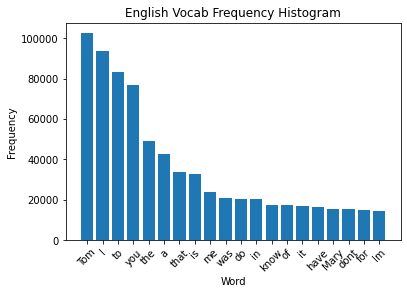

In [11]:
eng_count = eng_vocab.word2count
eng_count_top = dict(sorted(eng_count.items(), key=lambda x: x[1], reverse=True)[:20])

plt.bar(eng_count_top.keys(), eng_count_top.values())
plt.xticks(rotation=45)
plt.title('English Vocab Frequency Histogram')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

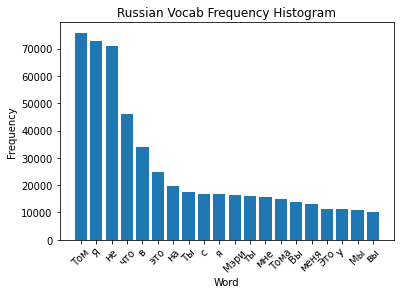

In [12]:
rus_count = rus_vocab.word2count
rus_count_top = dict(sorted(rus_count.items(), key=lambda x: x[1], reverse=True)[:20])

plt.bar(rus_count_top.keys(), rus_count_top.values())
plt.xticks(rotation=45)
plt.title('Russian Vocab Frequency Histogram')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

In [14]:
top_pairs = list(zip(eng_count_top.keys(), rus_count_top.keys()))
print(top_pairs)

[('Tom', 'Том'), ('I', 'Я'), ('to', 'не'), ('you', 'что'), ('the', 'в'), ('a', 'это'), ('that', 'на'), ('is', 'Ты'), ('me', 'с'), ('was', 'я'), ('do', 'Мэри'), ('in', 'ты'), ('know', 'мне'), ('of', 'Тома'), ('it', 'Вы'), ('have', 'меня'), ('Mary', 'Это'), ('dont', 'У'), ('for', 'Мы'), ('Im', 'вы')]


## Encoder-Decoder

In [15]:
import torch
import torch.nn as nn

class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        # self.embedding 
        # self.rnn = nn.LSTM
        self.hidden = hidden_size

class Decoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Decoder, self).__init__()
        # self.embedding 
        # self.rnn = nn.LSTM
        self.hidden = hidden

class Seq2SeqModel(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2SeqModel, self).__init__()
        self.encoder = encoder
        self.decoder = decoder